# K Nearest Neighbors Project 

Classic data science interview question. 
Predict the outcome from a "classified dataset", which means i have no idea what the data represents. 
This will be done with KNN, which looks at clusters to see if we plot a point what are the classes of the nearest points then.



In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

**Lets import the data and check out what we got.**

In [3]:
df = pd.read_csv('KNN_Project_Data')
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn with hue on the target class just for fun and to see if there is any clear trends.



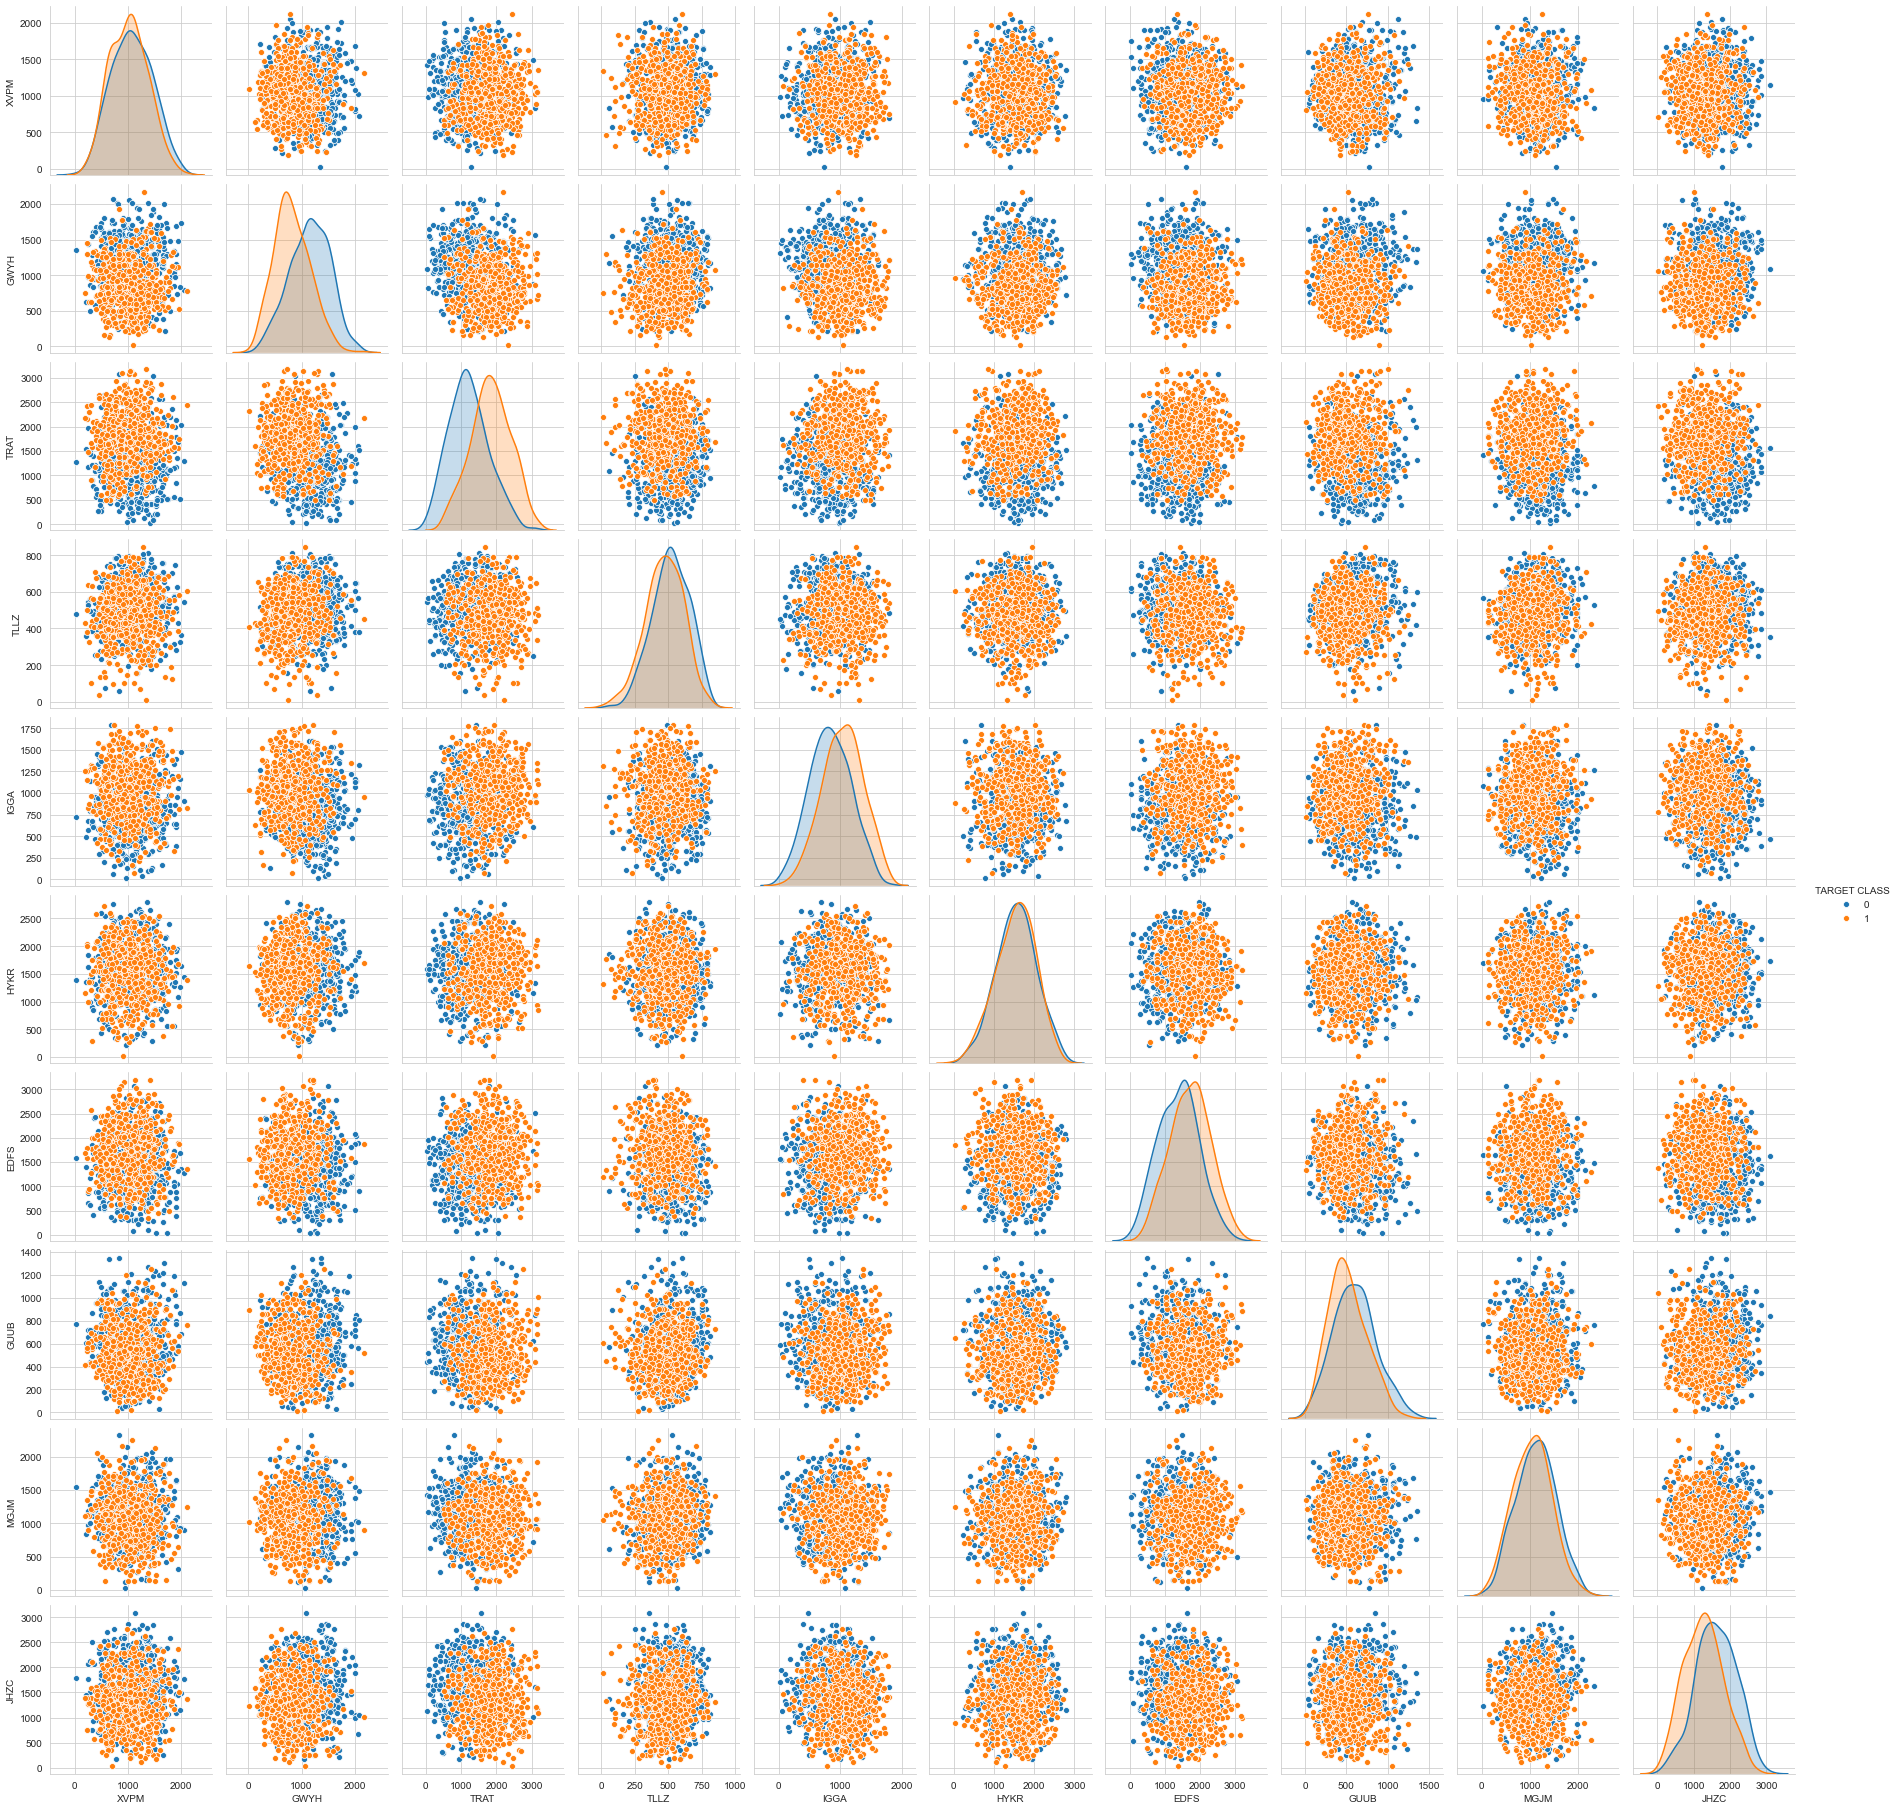

In [49]:
sns.pairplot(df,hue = 'TARGET CLASS') #blue = 0, orange = 1

so it doesn't look like there is any clear trend, some of them are a bit divided but nothing extreme. The TRAT column (third from left) looks most interesting tho. 

# Standardize the Variables

Why Scaling?
Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem.
If left alone, these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, 5kg and 5000gms. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [9]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

We then use the transform method to transform the features to a scaled version. 

In [8]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

We then convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.
giving it the same column name as our original dataframe without the last column as it was out target. 

In [12]:
scaleDf = pd.DataFrame(scaled_features,columns = df.columns[:-1]) 
scaleDf.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(scaleDf,df['TARGET CLASS'],test_size=0.30,randomstate=101)

# Using KNN


In [15]:
from sklearn.neighbors import KNeighborsClassifier

Now the thing is we have to tell the function how many neighbors it should count, but we dont know which number of neighbors is the best. Lets find out before going on. 

We do this by running the fit on numbers from 1-50 and calculate the error rate for each one, the one with the lowest error rate will be our number.

In [33]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

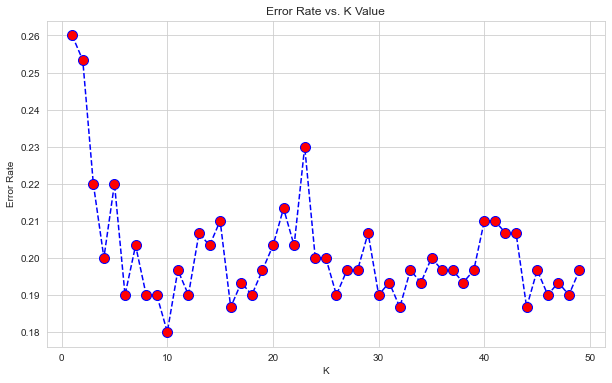

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

As we can see here, the lowest is a k = 10, so we go with that. 

In [44]:
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

# Predictions and Evaluations


In [45]:
predict = knn.predict(X_test)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print(confusion_matrix(y_test,predict))

[[128  29]
 [ 25 118]]


In [48]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       157
           1       0.80      0.83      0.81       143

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



We predicted this dataset with an accuracy of 82, which according to our graph is the best we can do.